In [2]:
import numpy as np


# TOOLS

In [3]:
# n_dice_prob
def n_dice_prob(n: int) -> list[float]:
    return (np.ones(n) / n).tolist()


# TASK 1 & 2

In [4]:
# Create the dice

dice4 = n_dice_prob(4)
dice6 = n_dice_prob(6)
dice8 = n_dice_prob(8)
dice12 = n_dice_prob(12)
dice20 = n_dice_prob(20)

# Convolve the dice

convolution = np.convolve(dice4, dice6)
convolution = np.convolve(convolution, dice8)
convolution = np.convolve(convolution, dice12)
convolution = np.convolve(convolution, dice20)

print("Length of convolution:", len(convolution))
print(convolution)


Length of convolution: 46
[2.17013889e-05 1.08506944e-04 3.25520833e-04 7.59548611e-04
 1.49739583e-03 2.62586806e-03 4.21006944e-03 6.29340278e-03
 8.87586806e-03 1.19140625e-02 1.53428819e-02 1.90755208e-02
 2.30034722e-02 2.69965278e-02 3.09244792e-02 3.46571181e-02
 3.80859375e-02 4.11241319e-02 4.37065972e-02 4.57899306e-02
 4.73524306e-02 4.83940972e-02 4.89149306e-02 4.89149306e-02
 4.83940972e-02 4.73524306e-02 4.57899306e-02 4.37065972e-02
 4.11241319e-02 3.80859375e-02 3.46571181e-02 3.09244792e-02
 2.69965278e-02 2.30034722e-02 1.90755208e-02 1.53428819e-02
 1.19140625e-02 8.87586806e-03 6.29340278e-03 4.21006944e-03
 2.62586806e-03 1.49739583e-03 7.59548611e-04 3.25520833e-04
 1.08506944e-04 2.17013889e-05]


In [5]:
# Sum indexes 0 to 5 (first 6)
sum_0_5 = sum(convolution[0:6])

# Sum last 6 indexes
sum_last_6 = sum(convolution[-6:])

# Sum of all indexes
sum_all = sum(convolution)

print(f"Sum of all indexes: {sum_all}")

probability_win = sum_0_5 + sum_last_6

print("Probability of winning:", probability_win)

Sum of all indexes: 0.9999999999999999
Probability of winning: 0.010677083333333332


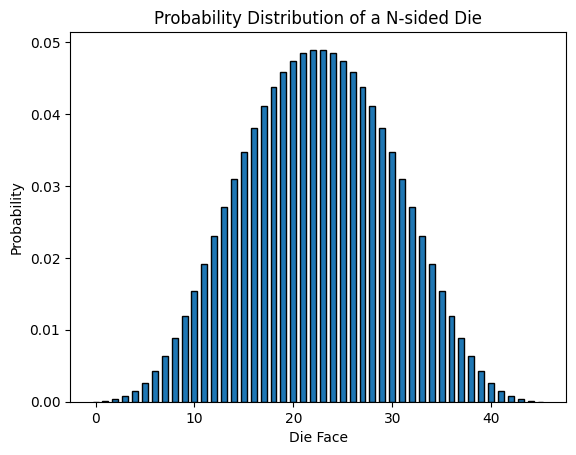

In [6]:
import matplotlib.pyplot as plt

# Plot
plt.bar(range(len(convolution)), convolution, width=0.6, edgecolor="black")
plt.title(f"Probability Distribution of a N-sided Die")
plt.xlabel("Die Face")
plt.ylabel("Probability")
plt.show()

# TASK 3

In [7]:
def n_dice(n: int) -> list[int]:
    return [i + 1 for i in range(n)]

In [8]:
from numpy import random

def monte_carlo_simulation(num_trials: int) -> float:
    NumberOfTrials = num_trials
    RecordResult = 0

    for i in range(NumberOfTrials):
        # Simulate the game
        dice4 = random.randint(1, 5)
        dice6 = random.randint(1, 7)
        dice8 = random.randint(1, 9)
        dice12 = random.randint(1, 13)
        dice20 = random.randint(1, 21)

        sum_dice = dice4 + dice6 + dice8 + dice12 + dice20

        if sum_dice <= 10 or sum_dice >= 45:
            RecordResult += 1

    win = RecordResult / NumberOfTrials
    #print("Probability of winning:", win)
    correct = 0.010677
    #print(f"Relative Error: {(np.abs(win-correct)/np.abs(correct)):.2f}")
    #print(f"Relative Error: {np.abs(1 - (win/correct)):.2f}")
    return np.abs(win-correct)/np.abs(correct)

In [9]:

print("Monte Carlo Simulation - 1000")
print(monte_carlo_simulation(1000))

print("Monte Carlo Simulation - 10")
print(monte_carlo_simulation(10))

print("Monte Carlo Simulation - 100000")
print(monte_carlo_simulation(100000))


Monte Carlo Simulation - 1000
0.15706659173925272
Monte Carlo Simulation - 10
1.0
Monte Carlo Simulation - 100000
0.026880209796759463


In [10]:
answers = [0] * 10

for m in range(1000):
    for n in range(8):
        trial_count = 1000 * (2**n)
        error = monte_carlo_simulation(trial_count)
        if error <= 0.1:
            answers[n] += 1
            break


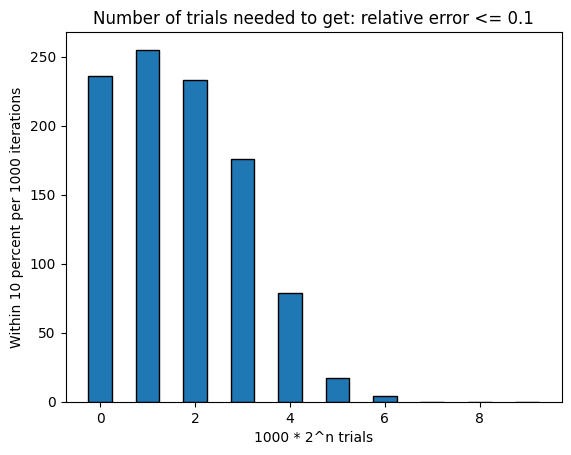

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate frequencies of unique values in answer
#unique, counts = np.unique(answer, return_counts=True)

plt.bar(np.arange(len(answers)), answers, width=0.5, edgecolor="black")
plt.title("Number of trials needed to get: relative error <= 0.1")
plt.xlabel("1000 * 2^n trials")
plt.ylabel("Within 10 percent per 1000 iterations")
plt.show()

In [14]:
for i in range (len(answers)):
    print(f"Trials out of 1000 that reached {str(1000 * (2**i)):>6} : {answers[i]:<3}")

Trials out of 1000 that reached   1000 : 236
Trials out of 1000 that reached   2000 : 255
Trials out of 1000 that reached   4000 : 233
Trials out of 1000 that reached   8000 : 176
Trials out of 1000 that reached  16000 : 79 
Trials out of 1000 that reached  32000 : 17 
Trials out of 1000 that reached  64000 : 4  
Trials out of 1000 that reached 128000 : 0  
Trials out of 1000 that reached 256000 : 0  
Trials out of 1000 that reached 512000 : 0  
